In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np

%matplotlib inline

In [2]:
user_page = pd.read_csv('user_table.csv')
home_page = pd.read_csv('home_page_table.csv')
search_page = pd.read_csv('search_page_table.csv')
payment_page = pd.read_csv('payment_page_table.csv')
confirmation_page = pd.read_csv('payment_confirmation_table.csv')

In [3]:
print(user_page)
print(home_page)
print(search_page)
print(payment_page)
print(confirmation_page)

       user_id        date   device     sex
0       450007  2015-02-28  Desktop  Female
1       756838  2015-01-13  Desktop    Male
2       568983  2015-04-09  Desktop    Male
3       190794  2015-02-18  Desktop  Female
4       537909  2015-01-15  Desktop    Male
5       993454  2015-03-03  Desktop    Male
6       377150  2015-04-15  Desktop  Female
7       137258  2015-01-27   Mobile    Male
8       608249  2015-04-12  Desktop  Female
9       615615  2015-02-24   Mobile  Female
10       96069  2015-04-13   Mobile  Female
11      664476  2015-02-13  Desktop  Female
12      236201  2015-03-14  Desktop    Male
13      796359  2015-04-02  Desktop    Male
14      592962  2015-04-25  Desktop    Male
15      971488  2015-02-27  Desktop  Female
16      610157  2015-02-11  Desktop  Female
17      561375  2015-04-11  Desktop  Female
18      624556  2015-01-25  Desktop    Male
19      443293  2015-03-19   Mobile    Male
20      435414  2015-03-11   Mobile  Female
21      969529  2015-04-14  Desk

In [4]:
df = pd.merge(left = user_page , right = home_page, how = 'left' ,on = 'user_id')
df = pd.merge(left = df, right = search_page, how = 'left', on = 'user_id', suffixes = ('_home', '_search'))
df = pd.merge(left = df, right = payment_page, how = 'left', on = 'user_id')
df = pd.merge(left = df, right = confirmation_page, how = 'left', on = 'user_id',suffixes = ('_payment', '_confirmation'))
df

,user_id,date,device,sex,page_home,page_search,page_payment,page_confirmation
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN
5,993454,2015-03-03,Desktop,Male,home_page,NaN,NaN,NaN
6,377150,2015-04-15,Desktop,Female,home_page,search_page,NaN,NaN
7,137258,2015-01-27,Mobile,Male,home_page,NaN,NaN,NaN
8,608249,2015-04-12,Desktop,Female,home_page,NaN,NaN,NaN
9,615615,2015-02-24,Mobile,Female,home_page,search_page,NaN,NaN


In [5]:
df['page_home'] = df['page_home'].map({'home_page': 1})
df['page_search']= df['page_search'].map({'search_page': 1})
df['page_payment'] =df['page_payment'].map({'payment_page': 1})
df['page_confirmation']= df['page_confirmation'].map({'payment_confirmation_page': 1})

In [35]:
total_list = [['page_home',df['page_home'].sum()],['page_search',df['page_search'].sum()],['page_payment',df['page_payment'].sum()],['page_confirmation',df['page_confirmation'].sum()]]
total = pd.DataFrame(total_list, columns = ['page','sum'])

In [36]:
total

,page,sum
0,page_home,90400.0
1,page_search,45200.0
2,page_payment,6030.0
3,page_confirmation,452.0


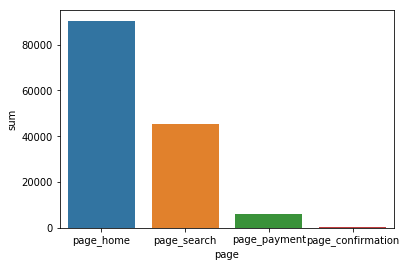

In [44]:
sns.barplot(x ='page', y = 'sum', data = total)

In [54]:
pages = df[['page_home','page_search','page_payment','page_confirmation']]

                page      mean
0          page_home  1.000000
1        page_search  0.500000
2       page_payment  0.066704
3  page_confirmation  0.005000


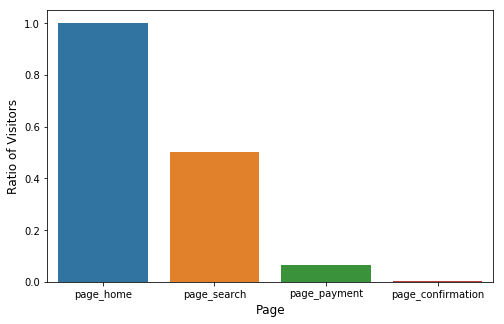

In [71]:
mean = []
for i in pages: 
    mean.append([i,df[i].mean()])
mean = pd.DataFrame(mean,columns =['page','mean'])

print(mean)

fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x = 'page', y = 'mean', data = mean)
ax.set_xlabel('Page', fontsize=12)
ax.set_ylabel('Ratio of Visitors', fontsize=12)
plt.show()

,page,mean
0,page_home,1.000000
1,page_search,0.500000
2,page_payment,0.066704
3,page_confirmation,0.005000
